## Lab 6
## Zohair Mubasheer Ahmed - 8897082

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import precision_score,accuracy_score,confusion_matrix,recall_score
from sklearn.metrics import make_scorer

- Load the iris Dataset

In [61]:
iris = load_iris(as_frame=True)
iris

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

- Getting the Dataset Characteristics

In [62]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

- Train/Test Split (For classes as either Non-Virginica (0) or virginica (1))

In [63]:
X = iris.data
y = iris.target_names[iris.target] == 'virginica' 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

- Initializing the Logistic Regression model

In [64]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

- Performing Predictions of the labels for all the data points

In [65]:
y_pred = model.predict(X_test)
print("Prediction Values")
y_pred

Prediction Values


array([False, False,  True, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False,  True, False,
       False,  True, False,  True, False,  True,  True,  True,  True,
        True, False, False])

In [66]:
print("Test Split")
y_test

Test Split


array([False, False,  True, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False,  True, False,
       False,  True, False,  True, False,  True,  True,  True,  True,
        True, False, False])

In [67]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Precision:", precision)
print("Recall",recall)
print("Accuracy:", accuracy)

Precision: 1.0
Recall 1.0
Accuracy: 1.0


- Crossvalidation

In [68]:
crossValidationScores = cross_val_score(model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=42))
print("Cross validation scores:", crossValidationScores)
print("Mean accuracy:", crossValidationScores.mean())
print("Standard deviation:", crossValidationScores.std())

Cross validation scores: [0.91666667 0.95833333 1.         0.91666667 1.        ]
Mean accuracy: 0.9583333333333333
Standard deviation: 0.03726779962499651


- Generating and Analyzing the confusion matrix

In [69]:
confusionMatrix = confusion_matrix(y_test, y_pred)
confusionMatrix

array([[19,  0],
       [ 0, 11]], dtype=int64)

In [70]:
y_cross_pred = cross_val_predict(model, X_test, y_test, cv=5)
cross_confusionMatrix = confusion_matrix(y_test, y_cross_pred)
print("Confusion Matrix:", cross_confusionMatrix)

Confusion Matrix: [[18  1]
 [ 1 10]]


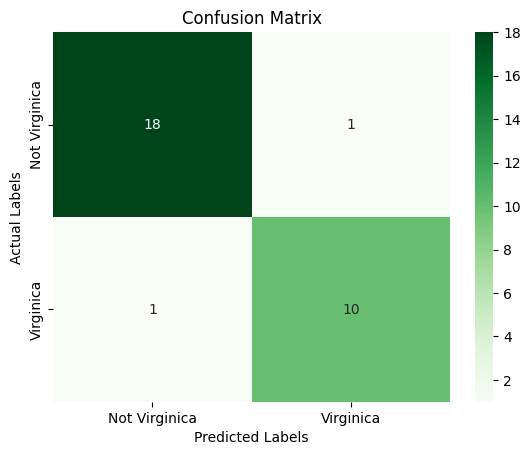

In [71]:
class_labels = ["Not Virginica", "Virginica"]

sns.heatmap(cross_confusionMatrix, annot=True, cmap="Greens", fmt="d", xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")

plt.show()

In [72]:
trueNegative, falsePositive, falseNegative, truePositive = confusion_matrix(y_test, y_cross_pred).ravel()
trueNegative, falsePositive, falseNegative, truePositive

(18, 1, 1, 10)

In [73]:
scoring = make_scorer(recall_score, average='macro') 
recallScore = cross_val_score(model, X_train, y_train, cv=5, scoring=scoring)
avg_recall_score = recallScore.mean()
print("Recall Scores:", recallScore)
print("Mean Recall Score:", avg_recall_score)

Recall Scores: [1.      0.9375  0.90625 0.96875 0.9375 ]
Mean Recall Score: 0.95


From the confusion matrix, we can see that the model correctly predicted 18 instances of Virginica and 18 instances of non-Virginica. However, it made 1 false negative prediction (predicted as non-Virginica but actually Virginica) and 1 false positive prediction (predicted as Virginica but actually non-Virginica).

Regarding the question about the model being wrong on certain data instances and shared properties among these cases, it's difficult to determine without additional information. It would require analyzing specific instances where the model made incorrect predictions and examining the properties of those instances.